# 数据预处理

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt
from gensim.models import FastText
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
import pickle 
train = pd.read_table('train.txt', header = None, names = ['text1','text2','label'])


D:\anaconda\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.

In [2]:
train.head()

,text1,text2,label
0,1573 1730 8392 0 689 7 2702,96 1573 1730 8392,1
1,4076 1223 3956 8784 1323,4076 8784 1323 1223 3956,1
2,1035 2149 6205 270 2646 1882 2689,3333 3009 17 1035 2149 6205 270,0
3,1039 31 0 12870 1743 2517 57 260,1039 31 0 12870 177 1743 2517 260,1
4,3500 1076 3865 22 3392 16096 5084,3500 1076 3865 2316 3392 225,0


In [3]:
#查看类别数
print(sum(train['label']==0))
print(sum(train['label']==1))

104771
143229


In [2]:
def transform(text):
    word_list = list(text.split())
    return word_list
train['text1'] = train["text1"].apply(transform) 
train['text2'] = train["text2"].apply(transform) 

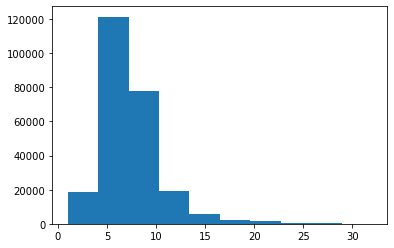

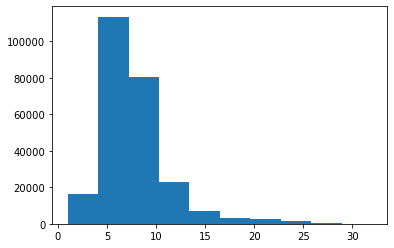

In [3]:
#观察句子长度
length1 = [len(text) for text in train['text1']]
length2 = [len(text) for text in train['text2']]
plt.hist(length1)
plt.show()
plt.hist(length2)
plt.show()

In [10]:
##构建词典

def preprocessing_word(s1_train, s2_train):
    s1_all = []
    s2_all = []
    all_data = []

    for s1,s2 in zip(s1_train, s2_train):

        all_data.extend(s1)
        all_data.extend(s2)
        s1_all.append(s1)
        s2_all.append(s2)

    source_list = []
    source_list.extend(list(set(all_data)))#生成词典
    word2id = {}
    id2word = {}
    for index, char in enumerate(source_list):
        word2id[char] = index
        id2word[index] = char

    return s1_all, s2_all, word2id, id2word

s1_data = train['text1']
s2_data = train['text2']
s1_all,s2_all,word2id,id2word = preprocessing_word(s1_data,s2_data)
print(len(id2word))

14119


In [13]:
train["text1_after"], train["text2_after"] = s1_all,s2_all
train.head()

,text1,text2,label,text1_after,text2_after
0,"[1573, 1730, 8392, 0, 689, 7, 2702]","[96, 1573, 1730, 8392]",1,"[1573, 1730, 8392, 0, 689, 7, 2702]","[96, 1573, 1730, 8392]"
1,"[4076, 1223, 3956, 8784, 1323]","[4076, 8784, 1323, 1223, 3956]",1,"[4076, 1223, 3956, 8784, 1323]","[4076, 8784, 1323, 1223, 3956]"
2,"[1035, 2149, 6205, 270, 2646, 1882, 2689]","[3333, 3009, 17, 1035, 2149, 6205, 270]",0,"[1035, 2149, 6205, 270, 2646, 1882, 2689]","[3333, 3009, 17, 1035, 2149, 6205, 270]"
3,"[1039, 31, 0, 12870, 1743, 2517, 57, 260]","[1039, 31, 0, 12870, 177, 1743, 2517, 260]",1,"[1039, 31, 0, 12870, 1743, 2517, 57, 260]","[1039, 31, 0, 12870, 177, 1743, 2517, 260]"
4,"[3500, 1076, 3865, 22, 3392, 16096, 5084]","[3500, 1076, 3865, 2316, 3392, 225]",0,"[3500, 1076, 3865, 22, 3392, 16096, 5084]","[3500, 1076, 3865, 2316, 3392, 225]"


In [14]:
##padding 和映射到固定长度

max_sentence_length = 15
def transform_word2id(data,word2id):
    wordidlist = []
    for i in data:
        if i in word2id.keys():
            wordidlist.append(word2id[i])
        else:
            wordidlist.append(word2id['0'])
    if len(wordidlist) <= max_sentence_length:
        wordidlist.extend([0]*(max_sentence_length-len(wordidlist)))
        return wordidlist
    else:
        return wordidlist[:max_sentence_length]

In [15]:
train["text1_after_map"] = train["text1_after"].apply(transform_word2id,word2id = word2id)
train["text2_after_map"] = train["text2_after"].apply(transform_word2id,word2id = word2id)
train.head()

,text1,text2,label,text1_after,text2_after,text1_after_map,text2_after_map
0,"[1573, 1730, 8392, 0, 689, 7, 2702]","[96, 1573, 1730, 8392]",1,"[1573, 1730, 8392, 0, 689, 7, 2702]","[96, 1573, 1730, 8392]","[14103, 3663, 5200, 7623, 7965, 3097, 12680, 0...","[3694, 14103, 3663, 5200, 0, 0, 0, 0, 0, 0, 0,..."
1,"[4076, 1223, 3956, 8784, 1323]","[4076, 8784, 1323, 1223, 3956]",1,"[4076, 1223, 3956, 8784, 1323]","[4076, 8784, 1323, 1223, 3956]","[11052, 8438, 10534, 3876, 11036, 0, 0, 0, 0, ...","[11052, 3876, 11036, 8438, 10534, 0, 0, 0, 0, ..."
2,"[1035, 2149, 6205, 270, 2646, 1882, 2689]","[3333, 3009, 17, 1035, 2149, 6205, 270]",0,"[1035, 2149, 6205, 270, 2646, 1882, 2689]","[3333, 3009, 17, 1035, 2149, 6205, 270]","[4458, 278, 1296, 13057, 8052, 12826, 5601, 0,...","[7427, 1845, 8840, 4458, 278, 1296, 13057, 0, ..."
3,"[1039, 31, 0, 12870, 1743, 2517, 57, 260]","[1039, 31, 0, 12870, 177, 1743, 2517, 260]",1,"[1039, 31, 0, 12870, 1743, 2517, 57, 260]","[1039, 31, 0, 12870, 177, 1743, 2517, 260]","[1546, 11976, 7623, 13358, 1419, 6465, 13656, ...","[1546, 11976, 7623, 13358, 4934, 1419, 6465, 1..."
4,"[3500, 1076, 3865, 22, 3392, 16096, 5084]","[3500, 1076, 3865, 2316, 3392, 225]",0,"[3500, 1076, 3865, 22, 3392, 16096, 5084]","[3500, 1076, 3865, 2316, 3392, 225]","[12035, 7217, 9200, 11097, 9932, 4241, 2620, 0...","[12035, 7217, 9200, 9848, 9932, 3314, 0, 0, 0,..."


In [9]:
# 将数据存到一个大列表里面，格式是[[s1,s2,y],[s1,s2,y],[s1,s2,y].......]
train_data = []
for i in range(len(train["text1"])):
    train_data.append([train["text1_after_map"][i],train["text2_after_map"][i],train["label"][i]])



In [10]:
##保存词典
# 将数据存入pickle中
with open("word_data.pk", 'wb') as f1:
    pickle.dump((train_data, word2id,id2word), f1)

# 读取文件

In [4]:
data_pk = 'word_data.pk'
with open(data_pk, 'rb') as f:
    train_data, word2id, id2word = pickle.load(f)

# 设置参数 

In [5]:
embedding_dim = 100
max_sentence_length = 15
lr = 0.0001
epoch_num = 20
batch_size = 1000

# 导入embedding矩阵

In [6]:
#从预训练模型中导入embedding矩阵
def get_embedding_matrix(w2v, embedding_dim, isWV = False):
    m = np.zeros(shape=(len(id2word), embedding_dim ))
    for i, w in id2word.items():
        if isWV:
            if w not in w2v.wv.vocab.keys():
                w2v.build_vocab(w, update=True)
                w2v.train(w, total_examples=w2v.corpus_count, epochs=w2v.iter)
            else:
                m[i, :] = w2v[w]
        else:
            m[i, :] = w2v[w]
    return m

w2v = FastText.load('pretraining/fastText.model')
embeddings = get_embedding_matrix(w2v, embedding_dim, )


D:\anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [6]:
embeddings.shape # 权重矩阵

(14119, 100)

In [7]:
# 将数据pad，生成batch数据返回，这里没有取余数。 切数据，返回n/batch_size个块
def get_batch(data, batch_size, shuffle=False):
    """
    :param data:
    :param batch_size:
    :param shuffle:
    :return:
    """
    # 乱序没有加
    if shuffle:
        np.random.shuffle(data)
    for i in range(len(data) // batch_size):
        data_size = data[i * batch_size: (i + 1) * batch_size]
        s1_data, s2_data, label_data = [], [], []
        for (s1_set, s2_set, y_set) in data_size:
            s1_data.append(s1_set)
            s2_data.append(s2_set)
            label_data.append(y_set)
        yield np.array(s1_data), np.array(s2_data), np.reshape(label_data,(-1,1))

In [8]:
graph_mhd = tf.Graph()
with graph_mhd.as_default():
    """
    构建神经网络的结构、损失、优化方法和评估方法
    """
    # shape[batch_size, 15]
    left_input = tf.placeholder(tf.int64, shape=[None, max_sentence_length], name="left_input")
    # shape[batch_size, 15]
    right_input = tf.placeholder(tf.int64, shape=[None, max_sentence_length], name="right_input")

    # shape[batch_size, labels]
    labels = tf.placeholder(tf.float32, shape=[None, 1], name="labels")
    # labels维度要与输入维度一致
    # [[1],[0],[1],[0],....]

    # dropout = 1- keep_prob
    dropout_pl = tf.placeholder(dtype=tf.float32, shape=(), name="dropout")
    # 0.2 
    # x x x  
    #  x x 
    # x x  x

    with tf.variable_scope("embeddings"):  # 命名空间
        # Variable，网络中真实的变量
        _word_embeddings = tf.Variable(embeddings,  # shape[len_words,200]
                                       dtype=tf.float32,
                                       trainable=True,  # 嵌入层是否可以训练 embeddings 
                                       name="embedding_matrix")
        # lookup，来一个id找对应的表示
        left_embeddings = tf.nn.embedding_lookup(params=_word_embeddings, ids=left_input, name="left_embeddings")
        # left_embeddings_shape：[batchsize,15,200] , 每个id变为200维的表示
        right_embeddings = tf.nn.embedding_lookup(params=_word_embeddings, ids=right_input, name="right_embeddings")

        left_embeddings = tf.nn.dropout(left_embeddings, dropout_pl) # embedding lookup之后加dropout
        right_embeddings = tf.nn.dropout(right_embeddings, dropout_pl)

    with tf.variable_scope("one_layer_bi-lstm"):
        # 词1层bi-lstm
        # two-layers_bi-lstm
        cell_fw = tf.nn.rnn_cell.LSTMCell(num_units=50)
        cell_bw = tf.nn.rnn_cell.LSTMCell(num_units=50)
        (left_output_fw_seq, left_output_bw_seq), left_states = tf.nn.bidirectional_dynamic_rnn(cell_fw, cell_bw,
                                                                                                left_embeddings,
                                                                                                dtype=tf.float32)
        # left_states_shape:[batchsize,100]
        left_bi_output = tf.concat([left_states[0].h, left_states[1].h], axis=-1)

        (right_output_fw_seq, right_output_bw_seq), right_states = tf.nn.bidirectional_dynamic_rnn(cell_fw, cell_bw,
                                                                                                   right_embeddings,
                                                                                                   dtype=tf.float32)
        right_bi_output = tf.concat([right_states[0].h, right_states[1].h], axis=-1) # 轴的操作
        # -< []
        # ->[]
        # item

    with tf.variable_scope("Similarity_calculation_layer"):
        def cosine_dist(input1,input2):
            pooled_len_1 = tf.sqrt(tf.reduce_sum(input1 * input1, 1))
            pooled_len_2 = tf.sqrt(tf.reduce_sum(input2 * input2, 1))
            pooled_mul_12 = tf.reduce_sum(input1 * input2, 1)
            score = tf.div(pooled_mul_12, pooled_len_1 * pooled_len_2 +1e-8, name="scores")
            return score

        def manhattan_dist(input1,input2):
            score = tf.exp(-tf.reduce_sum(tf.abs(input1-input2), 1))
            return score
        def multiply(input1,input2):
            score = tf.multiply(input1, input2)  # 矩阵按元素相乘
            #tf.matmul(matrix3, matrix2)  # 矩阵点积
            return score
        def subtract(input1,input2):
            score = tf.abs(input1-input2)
            return score
        def maximum(input1,input2):
            s1 = multiply(input1,input1)
            s2 = multiply(input2,input2)
            score = tf.maximum(s1,s2)
            return score

        cos = cosine_dist(left_bi_output, right_bi_output)
        # [batch_size,]
        man = manhattan_dist(left_bi_output, right_bi_output)
        mul = multiply(left_bi_output, right_bi_output)
        # [batch_size,100]
        sub = subtract(left_bi_output, right_bi_output)
        maxium = maximum(left_bi_output, right_bi_output)
        # 曼哈顿距离
        # output = tf.expand_dims(manhattan_dist(left_bi_output, right_bi_output), -1)
        # 相似度计算理解清楚？？？？
        last_list_layer = tf.concat([mul, sub, maxium], 1)
        last_drop = tf.nn.dropout(last_list_layer, 0.8)
        # 降维，300 -> 16
        dense_layer1 = tf.layers.dense(last_drop, 16, activation=tf.nn.relu)
        dense_layer2 = tf.layers.dense(last_drop, 24, activation=tf.nn.sigmoid)
        # expand_dims 升维
        output = tf.concat([dense_layer1, dense_layer2, tf.expand_dims(cos, -1), tf.expand_dims(man, -1)], 1)


    with tf.variable_scope("classification"):
        # logits:shape[batch_size, labels]
        # 层数越多，效果越好
        # 残差结构
        # dense 全连接层
        output = tf.layers.dense(output, 32)
        logits = tf.layers.dense(output, 1)

    # 计算损失
    # 计算分布之间的距离
    with tf.variable_scope("loss"):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=labels,logits=logits))



    #选择优化器
    # 优化器的发展历程
    # BGD、SGD、momentum
    # 了解过程
    with tf.variable_scope("train_step"):
        train_op = tf.train.AdamOptimizer(lr).minimize(loss)

    # 准确率/f1/p/r计算
    with tf.variable_scope("evaluation"):
        pred_rate = tf.sigmoid(logits,name="sig")
        pred = tf.cast(tf.greater(pred_rate, 0.5), tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, labels), tf.float32), name="accuracy")
        # 混淆矩阵
        # _|0 |1 |
        # 0|2 |3 |
        # 1|2 |3 |

        true = tf.reshape(labels, (-1,))
        pred = tf.reshape(pred, (-1,))

        epsilon = 1e-7
        cm = tf.contrib.metrics.confusion_matrix(true, pred, num_classes=2)

        precision = tf.cast(cm[1][1] / tf.reduce_sum(cm[:,1]),tf.float32,name="precision")
        recall = tf.cast(cm[1][1] / tf.reduce_sum(cm[1],axis=0),tf.float32,name="recall")
        f1_score = tf.cast((2 * precision * recall / (precision + recall + epsilon)),tf.float32,name="f1_score")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast inst

In [ ]:
with tf.Session(graph=graph_mhd) as sess:
    if True:
        # 保存
        saver = tf.train.Saver(tf.global_variables())
        init = tf.global_variables_initializer()
        sess.run(init)
        global_nums = 0
        for epoch in range(epoch_num):
            np.random.shuffle(train_data)
            ratio = int(len(train_data)*0.95)
            train= train_data[:ratio]
            validation = train_data[ratio:]
            for s1, s2, y in get_batch(train, batch_size, shuffle=True):
                _, l, acc, p, r, f, cmm = sess.run(
                    [train_op, loss,accuracy,precision,recall,f1_score,cm], {
                    left_input: s1,
                    right_input: s2,
                    labels : y,
                    dropout_pl: 0.8
                })
                global_nums += 1
                if global_nums % 50 == 0:
                    print(cmm)
                    # saver.save(sess, '../model_save/model.ckpt', global_step=global_nums)
                    print(
                        'train: epoch {}, global_step {}, loss: {:.4}, accuracy: {:.4} , precision {}, recall: {:.4}, fbeta_score: {:.4} '.format(epoch , global_nums,
                                                                                          l, acc,p, r, f))


                if global_nums % 200 == 0:
                    print('-----------------validation---------------')
                    s1, s2, y = next(get_batch(validation, np.shape(validation)[0],  shuffle=True))
                    l, acc, p, r, f,cmm = sess.run(
                        [ loss, accuracy, precision, recall, f1_score,cm], {
                            left_input: s1,
                            right_input: s2,
                            labels: y,
                            dropout_pl: 1
                        })
                    print(cmm)
                    print(
                        'validation: epoch {}, global_step {}, loss: {:.4}, accuracy: {:.4} , precision {}, recall: {:.4}, fbeta_score: {:.4} '.format(
                            epoch, global_nums,
                            l, acc, p, r, f))
                    print('-----------------validation---------------')
        s1, s2, y = next(get_batch(validation, np.shape(validation)[0], shuffle=True))
        l, acc, p, r, f, cmm = sess.run(
                    [loss, accuracy, precision, recall, f1_score, cm], {
                        left_input: s1,
                        right_input: s2,
                        labels: y,
                        dropout_pl: 1
                    })
        print(cmm)
        saver.save(sess, 'ckpt2/save_model', global_step=global_nums)
        print('validation: loss: {:.4}, accuracy: {:.4} , precision {}, recall: {:.4}, fbeta_score: {:.4} '.format(
                        l, acc, p, r, f))


[[ 15 399]
 [  6 580]]
train: epoch 0, global_step 50, loss: 0.6723, accuracy: 0.595 , precision 0.5924412608146667, recall: 0.9898, fbeta_score: 0.7412 
[[ 37 375]
 [ 10 578]]
train: epoch 0, global_step 100, loss: 0.6602, accuracy: 0.615 , precision 0.6065057516098022, recall: 0.983, fbeta_score: 0.7502 
[[110 281]
 [ 48 561]]
train: epoch 0, global_step 150, loss: 0.6242, accuracy: 0.671 , precision 0.6662707924842834, recall: 0.9212, fbeta_score: 0.7733 
[[184 242]
 [ 70 504]]
train: epoch 0, global_step 200, loss: 0.6178, accuracy: 0.688 , precision 0.6756032109260559, recall: 0.878, fbeta_score: 0.7636 
-----------------validation---------------
[[2017 3228]
 [ 871 6284]]
validation: epoch 0, global_step 200, loss: 0.6173, accuracy: 0.6694 , precision 0.6606391668319702, recall: 0.8783, fbeta_score: 0.7541 
-----------------validation---------------
[[177 247]
 [ 83 493]]
train: epoch 1, global_step 250, loss: 0.6185, accuracy: 0.67 , precision 0.6662161946296692, recall: 0.8559,

[[330  70]
 [ 65 535]]
train: epoch 8, global_step 2000, loss: 0.3243, accuracy: 0.865 , precision 0.8842975497245789, recall: 0.8917, fbeta_score: 0.888 
-----------------validation---------------
[[4145 1035]
 [ 747 6473]]
validation: epoch 8, global_step 2000, loss: 0.3273, accuracy: 0.8563 , precision 0.8621470332145691, recall: 0.8965, fbeta_score: 0.879 
-----------------validation---------------
[[330  84]
 [ 58 528]]
train: epoch 8, global_step 2050, loss: 0.342, accuracy: 0.858 , precision 0.8627451062202454, recall: 0.901, fbeta_score: 0.8815 
[[328  89]
 [ 75 508]]
train: epoch 8, global_step 2100, loss: 0.3762, accuracy: 0.836 , precision 0.8509212732315063, recall: 0.8714, fbeta_score: 0.861 
[[348  73]
 [ 74 505]]
train: epoch 9, global_step 2150, loss: 0.3286, accuracy: 0.853 , precision 0.8737024068832397, recall: 0.8722, fbeta_score: 0.8729 
[[334  87]
 [ 67 512]]
train: epoch 9, global_step 2200, loss: 0.3587, accuracy: 0.846 , precision 0.8547579050064087, recall: 0.